In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#import the basic libraries to start with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")


In [3]:
!ls /kaggle/input



bank-customer-churn


In [4]:
#import dataset.
df = pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")
df.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Perform EDA to exlpore the dataset

In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [6]:
df.shape

(10000, 18)

In [7]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [10]:
#Convert datatype
# Dropping irrelevant columns
int_values = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Display the descriptive statistics
int_values.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [11]:
# Checking skewness and kurtosis for 'Balance'
skewness = df['Balance'].skew()
kurtosis = df['Balance'].kurtosis()

print(f"Skewness of Balance: {skewness}")
print(f"Kurtosis of Balance: {kurtosis}")


Skewness of Balance: -0.14110871094154384
Kurtosis of Balance: -1.489411767941925


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


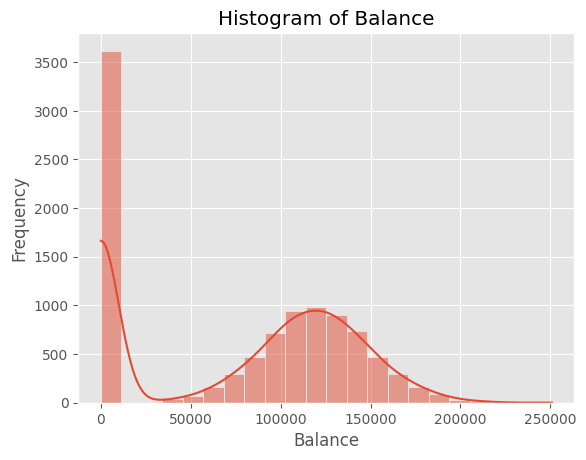

In [12]:
# Plotting the histogram for 'Balance' column

sns.histplot(df['Balance'], kde=True)
plt.title('Histogram of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

35% of the balance is 0 which in this case removing them would significantly reduce our data size. We shall leave them as 0 for now

In [13]:
# UNIVARIATE ANALYSIS

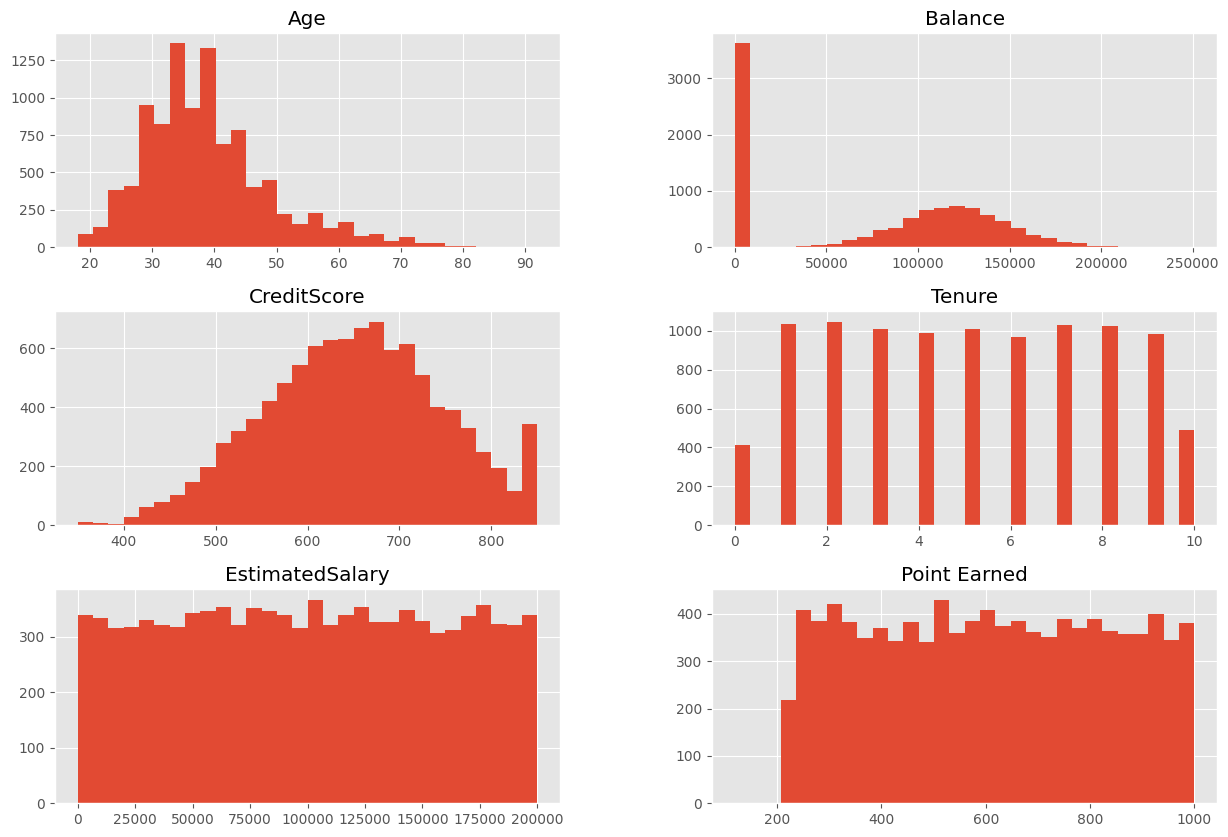

In [14]:
#visualizing the distributions
univariate = df[['Age', 'Balance', 'CreditScore', 'Tenure', 'EstimatedSalary', 'Point Earned']]

univariate.hist(bins=30, figsize=(15, 10))
plt.show()


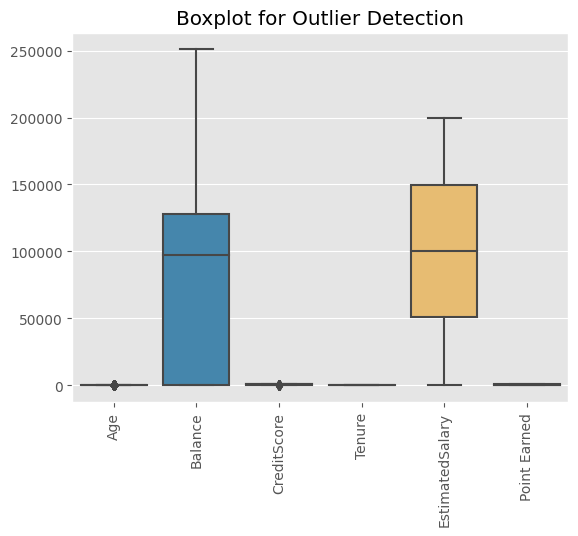

In [15]:
sns.boxplot(data=univariate)
plt.xticks(rotation=90)
plt.title('Boxplot for Outlier Detection')
plt.show()


<!-- No significant outlier to affect the model -->

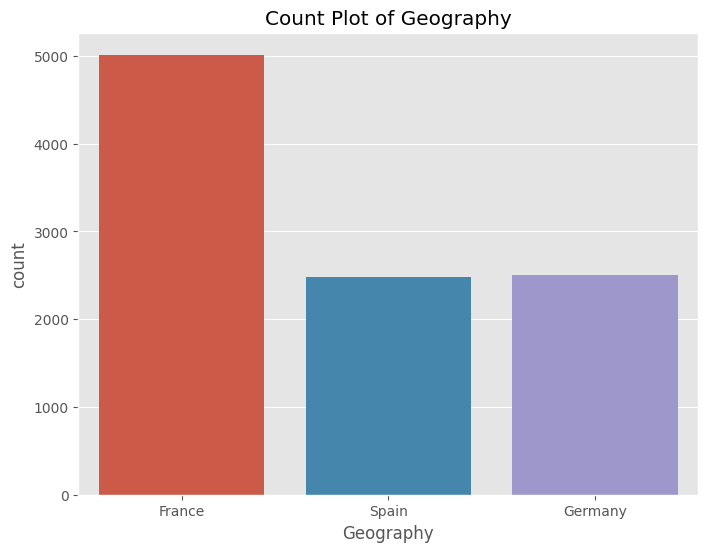

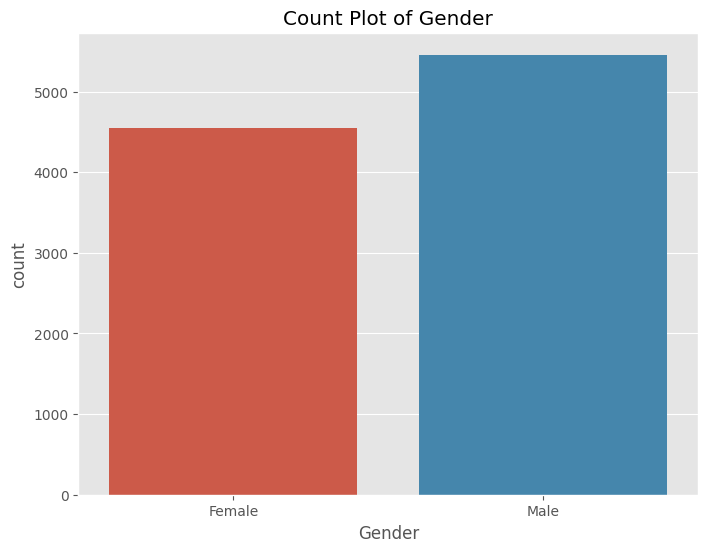

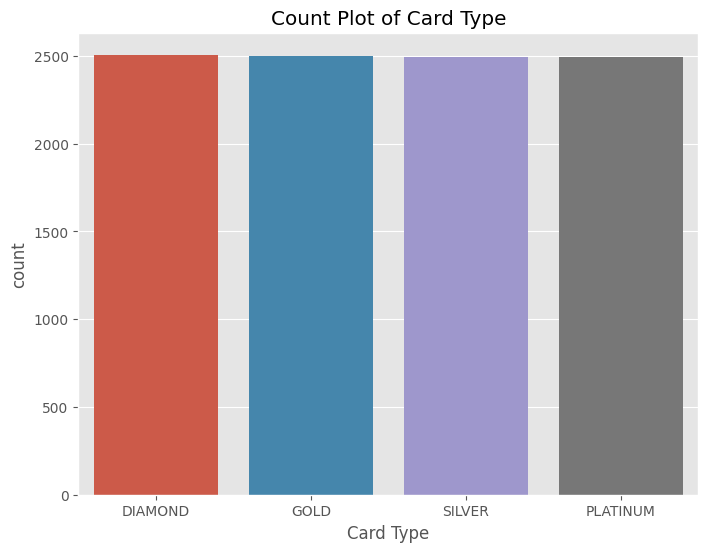

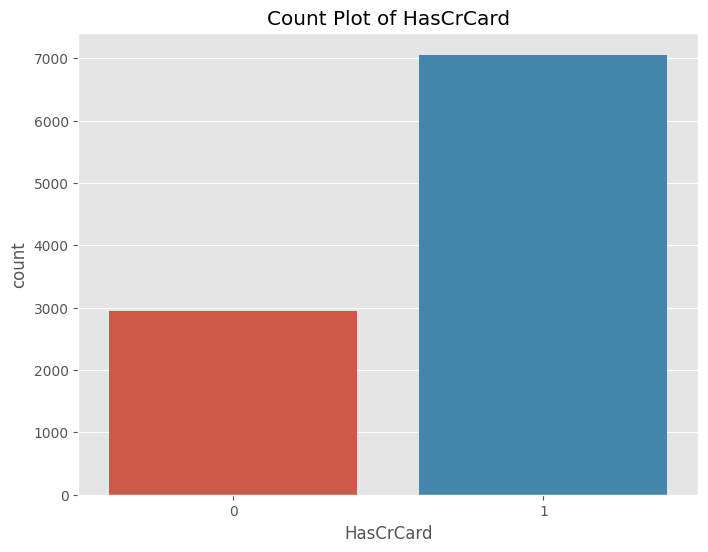

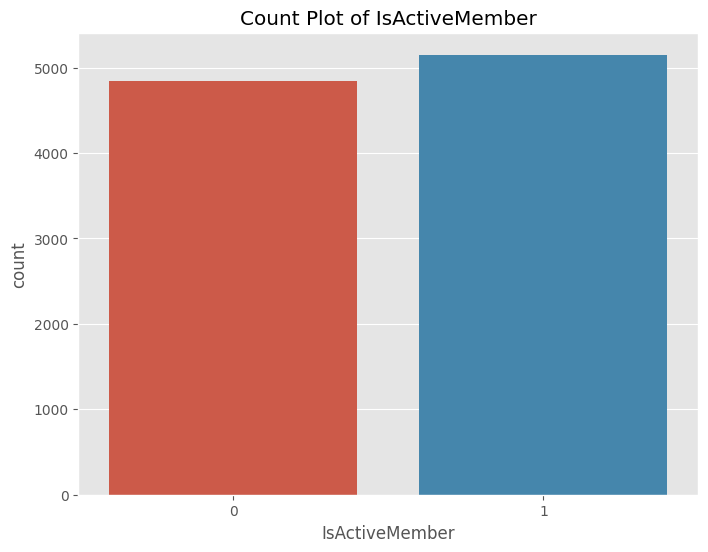

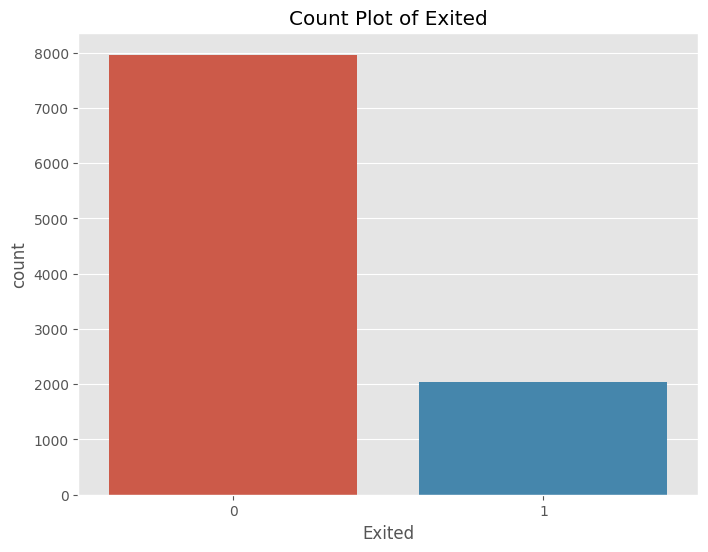

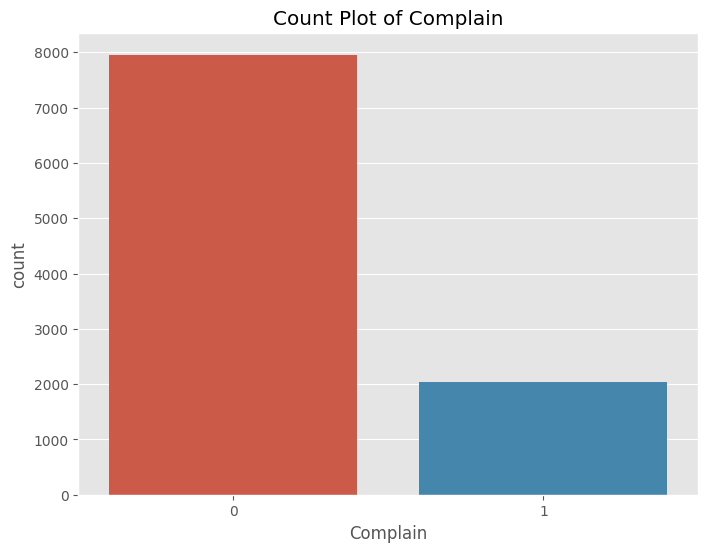

In [16]:

# List of categorical columns to visualize
categorical_columns = ['Geography', 'Gender', 'Card Type', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain']

# Create count plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot of {column}')
    plt.show()


The target variable Exited will require sampling same as our Independent

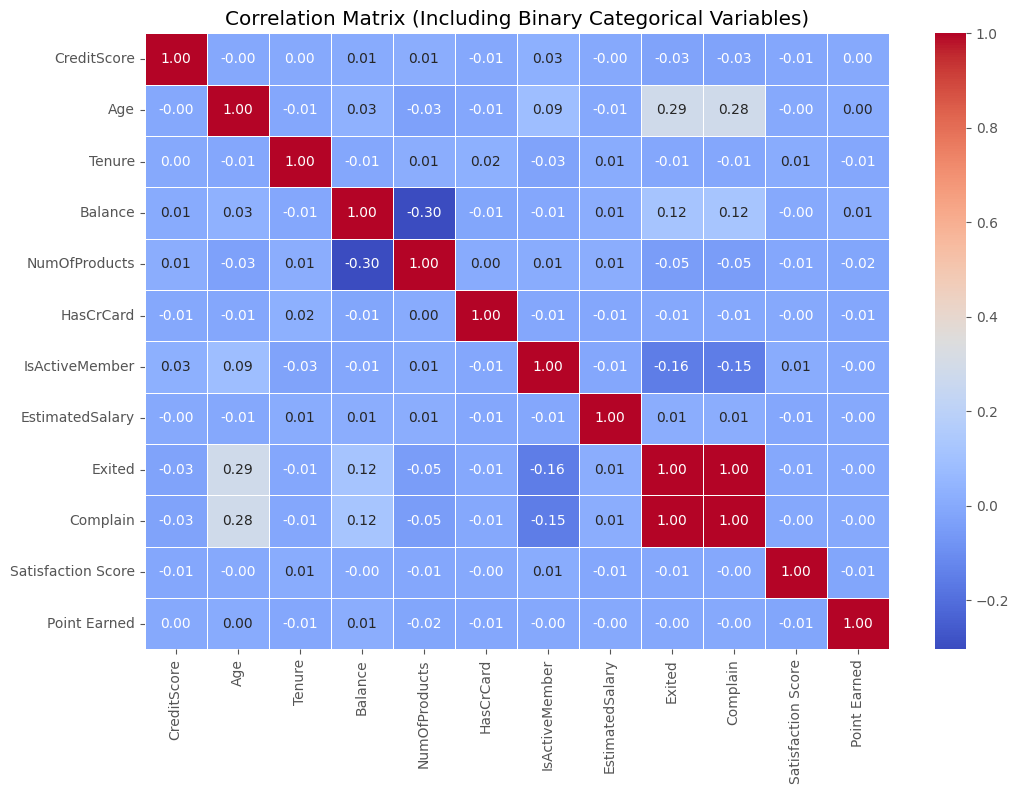

In [17]:
columns_to_include = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                      'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 
                      'Complain', 'Satisfaction Score', 'Point Earned']

# Compute the correlation matrix
corr_matrix = df[columns_to_include].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Including Binary Categorical Variables)')
plt.show()

**Drop complain due to Multicollinearity with dependent variable ******

In [18]:
data = df.drop(columns=['Complain']) 

In [19]:
#Convert categorical to numerical for model


In [20]:
data['HasCrCard'] = data['HasCrCard'].astype(int)
data['IsActiveMember'] = data['IsActiveMember'].astype(int)


In [21]:
# Apply get_dummies for one-hot encoding
data = pd.get_dummies(data, columns=['Card Type'], drop_first=False)

# Convert all newly created columns for 'Card Type' to integers
card_type_columns = ['Card Type_' + col for col in ['DIAMOND', 'GOLD', 'PLATINUM', 'SILVER']]
data[card_type_columns] = data[card_type_columns].astype(int)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,456,1,0,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,350,0,1,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,425,0,1,0,0


In [22]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=False)
gender_columns = ['Gender_' + col for col in ['Male', 'Female']]
data[gender_columns] = data[gender_columns].astype(int)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,...,101348.88,1,2,464,1,0,0,0,1,0
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,...,112542.58,0,3,456,1,0,0,0,1,0
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,...,113931.57,1,3,377,1,0,0,0,1,0
3,4,15701354,Boni,699,France,39,1,0.00,2,0,...,93826.63,0,5,350,0,1,0,0,1,0
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,...,79084.10,0,5,425,0,1,0,0,1,0


In [23]:
# Ensuring target variable is int dtype
data['Exited'] = data['Exited'].astype(int)


Feature Selection

In [24]:
X = data.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname', 'Geography'])  # Drop 'Exited' and 'Age'
y = df['Exited']

In [25]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,2,464,1,0,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,3,456,1,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,3,377,1,0,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,5,350,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,5,425,0,1,0,0,1,0


Scaling the dataset before training

In [26]:
#Only scaling relevant columns 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Balance', 'CreditScore', 'Tenure','Point Earned', 'NumOfProducts', 'EstimatedSalary', 'Age']] = scaler.fit_transform(
    X[['Balance', 'CreditScore', 'Tenure','Point Earned', 'NumOfProducts', 'EstimatedSalary', 'Age']])

In [27]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,2,-0.630839,1,0,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,3,-0.666251,1,0,0,0,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,3,-1.015942,1,0,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,5,-1.135457,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,5,-0.803472,0,1,0,0,1,0


Testing different models starting with logistic regression

Sampling dataset due to imbalance noted earlier

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')  # Can be adjusted as needed
X_resampled, y_resampled = smote.fit_resample(X, y)


In [29]:
#confirm sampling successfull
y_resampled.value_counts()

Exited
1    7962
0    7962
Name: count, dtype: int64

Accuracy: 0.779905808477237
Confusion Matrix:
[[1319  332]
 [ 369 1165]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1651
           1       0.78      0.76      0.77      1534

    accuracy                           0.78      3185
   macro avg       0.78      0.78      0.78      3185
weighted avg       0.78      0.78      0.78      3185



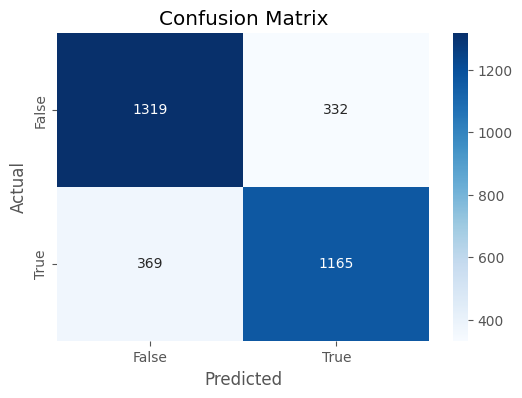

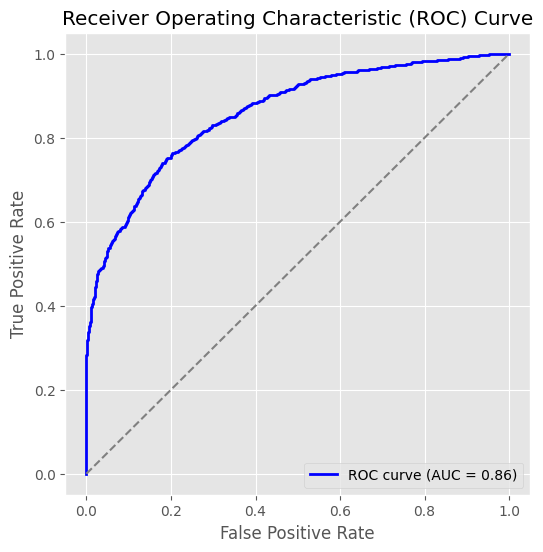

In [30]:
#Logistic Regression with confusion Matrix and ROC curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Use the resampled data for training
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


from sklearn.metrics import roc_curve, auc
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_prob = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

77% accuracy for logistic regression. 

Accuracy: 0.8819466248037676
Confusion Matrix:
[[1440  211]
 [ 165 1369]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1651
           1       0.87      0.89      0.88      1534

    accuracy                           0.88      3185
   macro avg       0.88      0.88      0.88      3185
weighted avg       0.88      0.88      0.88      3185



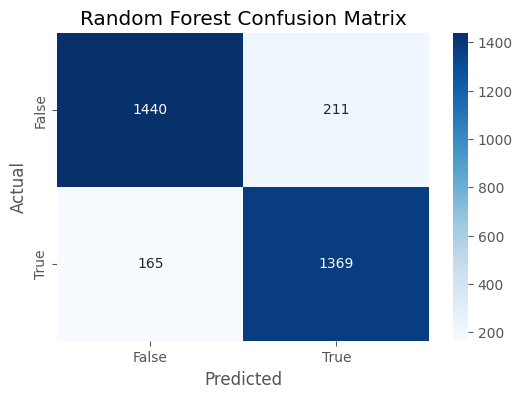

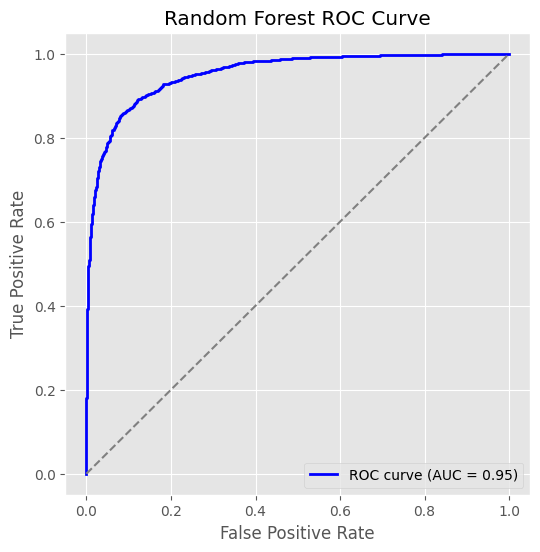

Training Accuracy: 0.99
Test Accuracy: 0.88


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)

# Step 2: Fit the model on the resampled data
rf.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Step 4: Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

# Step 5: Confusion Matrix Plot
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 6: ROC-AUC Curve
# Getting probabilities for the positive class
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Calculate AUC (Area Under the Curve)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Training set predictions
y_train_pred_rf = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
test_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


#Confirm Hyperparameters to avoid overfitting or underfitting

In [32]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# print(f"Best parameters: {grid_search.best_params_}")


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Cross-validation accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


Cross-validation accuracy: 0.88 ± 0.01


Accuracy: 0.8154039347007116
Confusion Matrix:
[[1969  494]
 [ 388 1927]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2463
           1       0.80      0.83      0.81      2315

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778



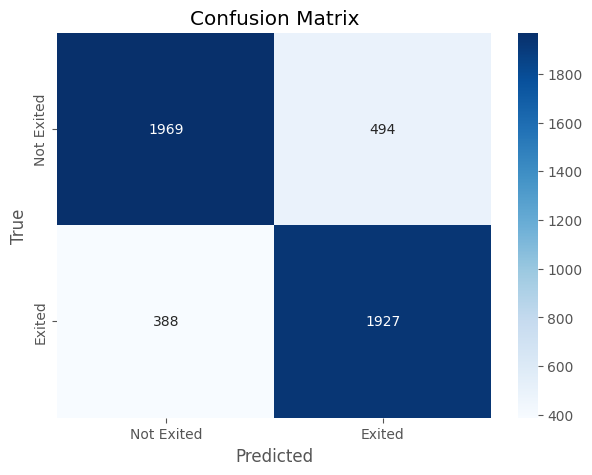

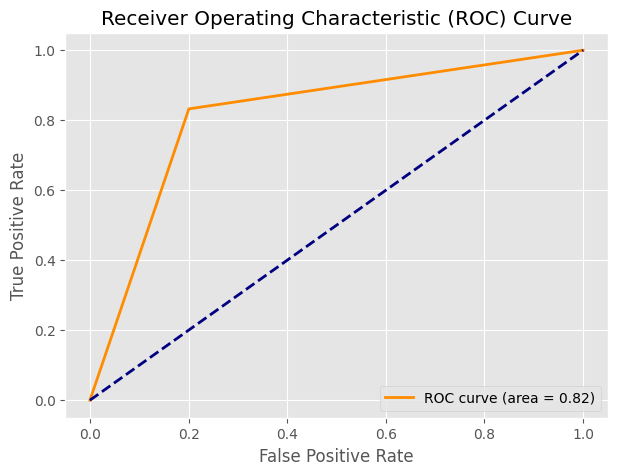

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.7714524905818334
Confusion Matrix:
[[1952  511]
 [ 581 1734]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      2463
           1       0.77      0.75      0.76      2315

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778



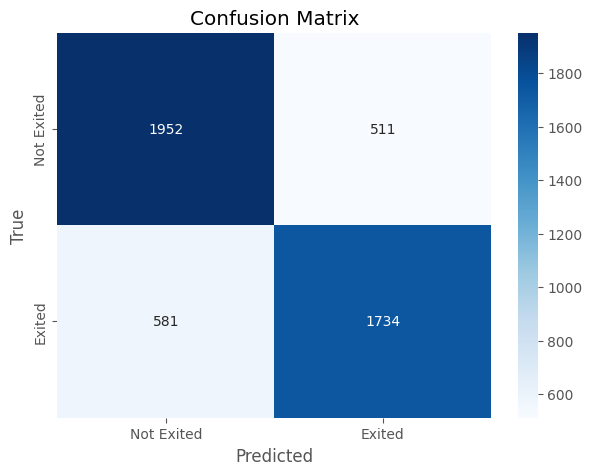

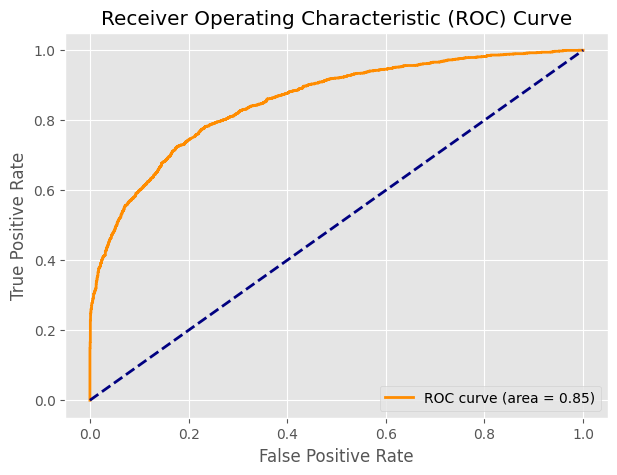

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SVM classifier
svm = SVC(kernel='linear', random_state=42, probability=True)
svm.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm.predict(X_test)

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svm)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.7676852239430724
Confusion Matrix:
[[1883  580]
 [ 530 1785]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2463
           1       0.75      0.77      0.76      2315

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778



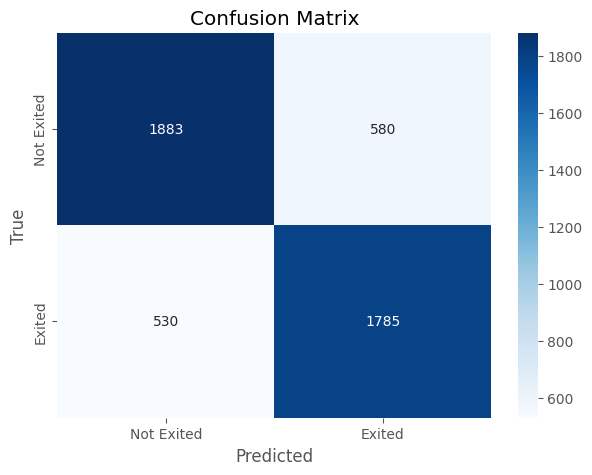

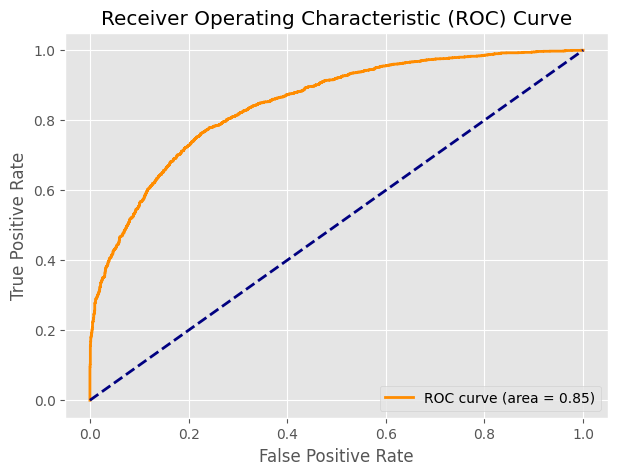

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initializing Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Making predictions
y_pred_nb = nb.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_nb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_nb)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Accuracy on Train Set: 1.0
Accuracy on Test Set: 0.9012138970280452
Confusion Matrix (Test Set):
[[2241  222]
 [ 250 2065]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2463
           1       0.90      0.89      0.90      2315

    accuracy                           0.90      4778
   macro avg       0.90      0.90      0.90      4778
weighted avg       0.90      0.90      0.90      4778



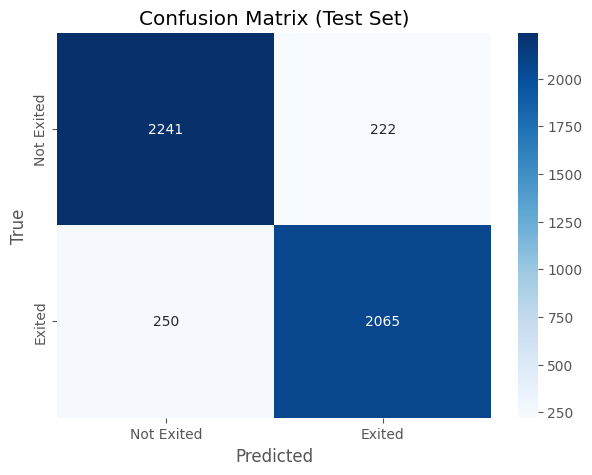

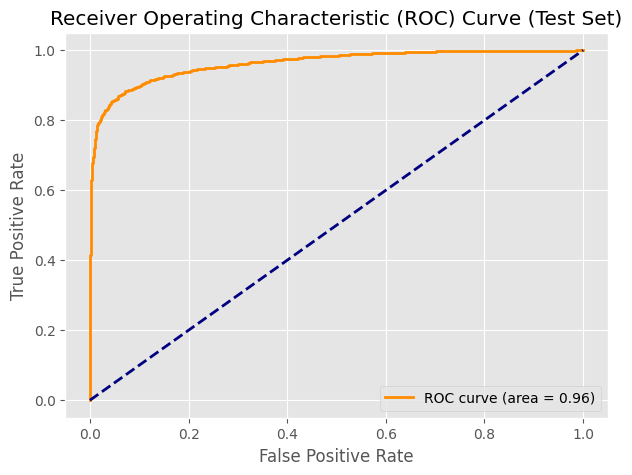

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the model
xgb = XGBClassifier(random_state=42)

# Define hyperparameters to sample from
param_dist = {
    'n_estimators': [50, 100, 200, 500],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],            # Depth of the trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],          # Fraction of training samples used to fit each tree
    'colsample_bytree': [0.7, 0.8, 1.0],   # Fraction of features used by each tree
    'gamma': [0, 0.1, 0.2],                # Regularization parameter
}

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)

# Fit the model
random_search.fit(X_train, y_train)

# Best hyperparameters found
print(f"Best Hyperparameters: {random_search.best_params_}")

# Get the best estimator
best_xgb_random = random_search.best_estimator_

# Make predictions on both training and test sets
y_pred_train = best_xgb_random.predict(X_train)
y_pred_test = best_xgb_random.predict(X_test)

# Evaluate the model
print(f"Accuracy on Train Set: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred_test)}")
print(f"Confusion Matrix (Test Set):\n{confusion_matrix(y_test, y_pred_test)}")
print(f"Classification Report (Test Set):\n{classification_report(y_test, y_pred_test)}")

# Confusion Matrix for Test Set
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for Test Set
fpr, tpr, thresholds = roc_curve(y_test, best_xgb_random.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend(loc='lower right')
plt.show()


Out of all the models tested XGBoost performs better with accuracy of 90 and 90% to 91% in positive and 91 to 89 in negative for precision and recall respectively

This means the model is able to predict 91% of the customers will churn and 89% of the do churn turn out to churn. Although the model can be improved, this performance is good to allow business to take action on those clients preidcted to churn

Increase in the dataset can allow improvement of the model prediction especially with complex models that require large dataset to efficiently learn from




In [38]:
#Append the model prediction to initial dataset to visualize later in tableau 
#Check how the model is performing 